In [39]:
import scipy.io as spio
import matplotlib.pyplot as plt

In [3]:
matdata = spio.loadmat('motor_cortex_data.mat')

In [48]:
neuronsData =matdata['spk_rast'][0]

In [175]:
def plotNeuron(neuronData,n):
    u,ul,l,dl,d,dr,r,ur=[],[],[],[],[],[],[],[]
    for dat,td in zip(list(neuronData[0]),list(neuronData[1])):#trie_dir
        
        if td[1]>0 and td[0]==0:#up
            u.append(dat)
        elif td[1]<0 and td[0]==0:#down
            d.append(dat)
        elif td[1]==0 and td[0]>0:#right
            r.append(dat)
        elif td[1]==0 and td[0]<0:#left
            l.append(dat)
        elif td[1]>0 and td[0]<0:#up left
            ul.append(dat)
        elif td[1]>0 and td[0]>0:#up right
            ur.append(dat)
        elif td[1]<0 and td[0]<0:#down left
            dl.append(dat)
        elif td[1]<0 and td[0]>0:#down right
            dr.append(dat)
    plt.figure(figsize=(15,10)) 
    
    #up left
    plt.subplot(3, 3, 1)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(ul)
    #up 
    plt.subplot(3, 3, 2)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(u)
    #up right 
    plt.subplot(3, 3, 3)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(ur)

    #left
    plt.subplot(3, 3, 4)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(l)
    
    
    #center
    
    plt.subplot(3, 3, 5)
    plt.title('Neurona %d'%n)
    plt.xlim((-1.1,1.1))
    plt.ylim((-1.1,1.1))
    plt.plot([0],[1],'o',label="u")
    plt.plot([0],[-1],'o',label="d")
    plt.plot([-1],[0],'o',label="l")
    plt.plot([1],[0],'o',label="r")
    plt.plot([-.7],[.7],'o',label="ul")
    plt.plot([.7],[.7],'o',label="ur")
    plt.plot([-.7],[-.7],'o',label="dl")
    plt.plot([.7],[-.7],'o',label="dr")
    plt.legend(loc='center')
    
    #right 
    plt.subplot(3, 3, 6)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(r)

    #down left
    plt.subplot(3, 3, 7)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(dl)
    #down 
    plt.subplot(3, 3, 8)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(d)
    #down right 
    plt.subplot(3, 3, 9)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(dr)
    plot.savefig("neurona%d.png"%i)
    plt.show()

In [176]:
#neurona 1 abajo?
#neurona 4 tiene preferencia hacia la Arriba
#neurona 5 pareciera tener una leve preferencia hacia derecha?
#neurona 7 abajo leve derecha
#neurona 12 tiene preferencia hacia derecha leve arriba
#neurona 13 tiene preferencia abajo leve izquierda
#neurona 15 pareciera tender a la izquierda pero muy difuso
#neurona 17 tiene preferencia izquierda
#neurona 18 tiene preferencia arriba, leve izquierda
#neurona 21 tiene una muy marcada prefercia hacia abajo
#neurona 24 pareciera tener cierta tendencia hacia abajo derecha
#neurona 26 difuso pero con una cierta tendencia hacia abajo



Neurona 29


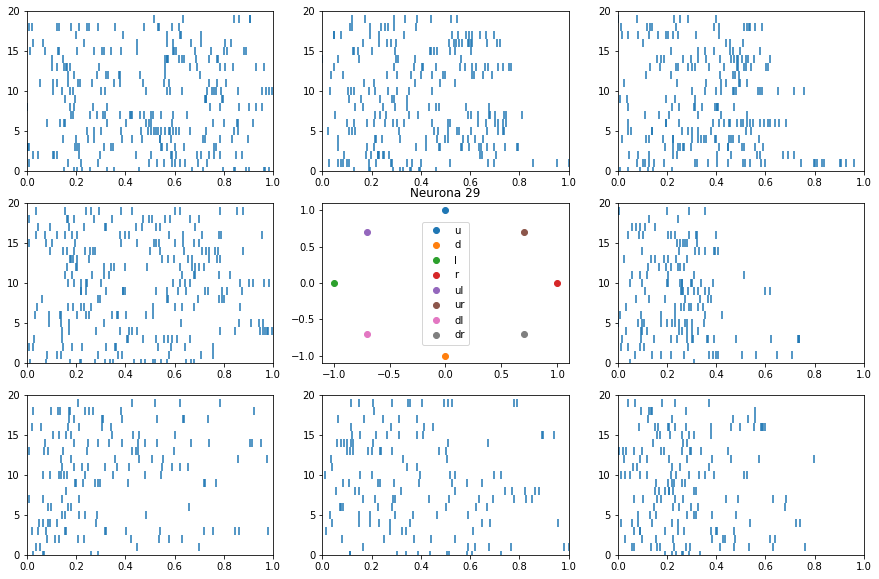

In [177]:
import time
from IPython.display import clear_output

for i in range(30):
    clear_output()
    print "Neurona %d"%i
    plotNeuron(neuronsData[i],i)
    
    time.sleep(2)

In [ ]:
g,b =zip(neuronsData[3][0],neuronsData[3][1])[0]

In [73]:
b

array([1., 0.])